# BTS Lyrics Comparison


![](https://static.billboard.com/files/2020/11/bts-press-photo-2020-billboard-1548-1604933999-compressed.jpg)
(Photo credit: [Billboard](https://www.billboard.com/))

## Introduction 
BTS(Korean: 방탄소년단), AKA Bangtan Boys, is a seven-member South Korean boy band debuted in 2013 under Big Hit Entertainment.

I think most of you have heard one of their latest and popular song “Dynamite” last year (2020) broke the records. This song's has the most viewed in a single day in Youtube history, most commented video on the platform, and second most commented video of all time.  

This song debuted by breaking several records  - No.1 on the Billboard for total three weeks; No.1 on Spotify's daily Global Top 50 chart; No.1s on iTunes within 8 hours. 
This song even broke the record for the fastest viral music video by generating 101.1 million views within 24 hours, according to [Statstia](https://www.statista.com/statistics/478082/fastest-viral-videos-views-in-24-hours/#:~:text=In%20August%202020%2C%20South%20Korean,record%20of%2086.3%20million%20views.). 


## BTS songs and lyrics are catchy and that get stuck in my head! 

Whenever I listen to BTS songs, it get stuck in my head.

Personally, I prefer listening to songs with positive vibe because it really effects my mood. I don't personally like listening to songs about bullying and mental health. BTS songs motivates me with relatable and inspirational words (i.e., "Love Yourself", "Life Goes On", etc.). See this reference [5 Reasons Why You Should Stan BTS) 
(https://thehoneypop.com/2019/12/16/5-reasons-to-stan-bts/)

In this notebook, I want to see which words were used the most in each BTS songs via [word embedding](https://en.wikipedia.org/wiki/Word_embedding), then visualize lyrics similarity using a machine learning method called t_SNE and an interactive visualizing library called Bokeh. 

# Table of Contents

1. Data exploration
2. Focus on one album song by BTS
3. Tokenizing the lyrics + Word Cloud
4. Initializing a document-term matrix (DTM)
5. Creating a counter function
6. The Song-Lyric matrix!
7. Dimension reduction with t-SNE
8. Let's map the items with Bokeh
9. Adding a hover tool
10. Mapping the songs
11. Comparing lyrics of two songs

# Data Exploration

## Import Library

In [91]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

## Read Data

In [92]:
df = pd.read_csv('/kaggle/input/bts-lyrics/lyrics-v0.2.csv')
display(df.sample(5))

,id,album_title,eng_album_title,album_rd,album_seq,track_title,kor_track_title,eng_track_title,lyrics,hidden_track,remix,featured,performed_by,repackaged,lang
100,100,WINGS,WINGS,2016-10-10,5,Stigma,NaN,Stigma,i’ve been hiding it\ni tell you something\njus...,False,False,NaN,V,False,KOR
7,7,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,8,Skit: On The Start Line,NaN,Skit: On The Start Line,"ah-ah\ntrainee\nin many ways, this term define...",True,False,NaN,BTS,False,KOR
117,117,You Never Walk Alone,You Never Walk Alone,2017-02-13,7,Reflection,NaN,Reflection,i know\nevery life’s a movie\nwe got different...,False,False,NaN,RM,True,KOR
123,123,You Never Walk Alone,You Never Walk Alone,2017-02-13,13,21세기 소녀 (21st Century Girl),21세기 소녀,21st Century Girl,you worth it you perfect\ndeserve it just work...,False,False,NaN,BTS,False,KOR
143,143,LOVE YOURSELF 轉 ‘Tear’,Love Yourself: Tear,2018-05-18,4,134340,NaN,134340,"if only i could, i wanted to ask you\nwhy did ...",False,False,NaN,BTS,False,KOR


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               226 non-null    int64 
 1   album_title      226 non-null    object
 2   eng_album_title  226 non-null    object
 3   album_rd         226 non-null    object
 4   album_seq        226 non-null    int64 
 5   track_title      226 non-null    object
 6   kor_track_title  66 non-null     object
 7   eng_track_title  206 non-null    object
 8   lyrics           220 non-null    object
 9   hidden_track     226 non-null    bool  
 10  remix            226 non-null    bool  
 11  featured         9 non-null      object
 12  performed_by     224 non-null    object
 13  repackaged       226 non-null    bool  
 14  lang             223 non-null    object
dtypes: bool(3), int64(2), object(10)
memory usage: 22.0+ KB


### Pre-Processing

In [94]:
# Remove duplicates, if any
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [95]:
# make all na fields reflect as such
df = df.fillna('NA')

# ensure date format for album release date
df['album_rd'] = pd.to_datetime(df.album_rd)

# ignore any track that does not have any lyrics or are album notes
df = df[~df['eng_track_title'].str.contains('skit', case=False) & ~df['eng_track_title'].str.contains('note', case=False)]


In [96]:
# Inspect the types of album
df.eng_album_title.value_counts()

Love Yourself: Answer                               26
The Most Beautiful Moment In Life: Young Forever    23
MAP OF THE SOUL: 7                                  20
You Never Walk Alone                                18
WINGS                                               15
Dark and Wild                                       14
Love Yourself: Tear                                 11
Skool Luv Affair (Special Addition)                 11
Love Yourself: Her                                   9
Skool Luv Affair                                     9
O!RUL8,2?                                            9
The Most Beautiful Moment In Life Pt.2               8
BE                                                   8
The Most Beautiful Moment In Life Pt.1               8
MAP OF THE SOUL: PERSONA                             7
2 Cool 4 Skool                                       7
Dynamite (NightTime Version)                         6
Dynamite (DayTime Version)                           6
Name: eng_

In [97]:
df.lyrics.value_counts()

NA                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 0 to 225
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               215 non-null    int64         
 1   album_title      215 non-null    object        
 2   eng_album_title  215 non-null    object        
 3   album_rd         215 non-null    datetime64[ns]
 4   album_seq        215 non-null    int64         
 5   track_title      215 non-null    object        
 6   kor_track_title  215 non-null    object        
 7   eng_track_title  215 non-null    object        
 8   lyrics           215 non-null    object        
 9   hidden_track     215 non-null    bool          
 10  remix            215 non-null    bool          
 11  featured         215 non-null    object        
 12  performed_by     215 non-null    object        
 13  repackaged       215 non-null    bool          
 14  lang             215 non-null    object   

### Filling Gaps

In [99]:
# make all na fields reflect as such
df = df.fillna('NA')

# ensure date format for album release date
df['album_rd'] = pd.to_datetime(df.album_rd)

# ignore any track that does not have any lyrics or are album notes
df = df[~df['eng_track_title'].str.contains('skit', case=False) & ~df['eng_track_title'].str.contains('note', case=False)]
df['lyrics']

0      we’re now going to progress to some steps\nwhi...
1      (what) give it to me\n (what) be nervous\n (wh...
3      hey, what's your dream?\n hey, what’s your dre...
4                                                     NA
5      wanna be loved…\n\ndon’t wanna be fool wanna b...
                             ...                        
221    Jin: Billboard No. 1 singer is entering\nJ-hop...
222    Every time during the same day\nI feel the hap...
223    Mm, uh-oh\nUh, it looks like I lost something\...
224    Was it a dream?\nI think I saw you\nWhen I ope...
225    Cause I, I, I'm in the stars tonight\nSo watch...
Name: lyrics, Length: 215, dtype: object

### Lyrics Normalisation
#### Method adapted from :

In [100]:
import re
def normalise(text, remove_punc=True):
    """method to normalise text"""
    # change text to lowercase and remove leading and trailing white spaces
    text = text.lower().strip()

    # remove punctuation
    if remove_punc:
        # remove punctuation
        text = re.sub(r'[\W]', ' ', text)
        # remove double spacing sometimes caused by removal of punctuation
        text = re.sub(r'\s+', ' ', text)

    return text

In [133]:
# normalise lyrics
df['lyrics'] = df['lyrics'].apply(lambda x: normalise(x))

# 2. Focus on one album song by BTS 
- There are 16 albums in this dataset and total of 226 songs. Let's setu up a workflow so its outputs (a t-SNE model and a visualization of that model) can be customized. For the example in this notebook, let's focus in on "MAP OF THE SOUL: 7" album filtering the data accordingly.

In [134]:
#I'd like to first extract "BE" album which is the latest album released on 

# Filter for album_title
df_album = df[df['eng_album_title'] == 'MAP OF THE SOUL: 7']
df_album

# Filter for dry skin as well
df_title = df_album[df_album['performed_by'] == "BTS"]
df_title

# Reset index
df_title = df_title.reset_index(drop = True)
df_title

,id,album_title,eng_album_title,album_rd,album_seq,track_title,kor_track_title,eng_track_title,lyrics,hidden_track,remix,featured,performed_by,repackaged,lang
0,187,MAP OF THE SOUL: 7,MAP OF THE SOUL: 7,2020-02-21,2,작은 것들을 위한 시 (Boy With Luv) ft. Halsey,작은 것들을 위한 시 ft. Halsey,Boy With Luv ft. Halsey,oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh o...,False,False,Halsey,BTS,True,KOR
1,188,MAP OF THE SOUL: 7,MAP OF THE SOUL: 7,2020-02-21,3,Make It Right,NA,Make It Right,the moment i noticed myself i had to leave i h...,False,False,NA,BTS,True,KOR
2,189,MAP OF THE SOUL: 7,MAP OF THE SOUL: 7,2020-02-21,4,Jamais Vu,NA,Jamais Vu,i think i lost again you look like you re mad ...,False,False,NA,BTS,True,KOR
3,191,MAP OF THE SOUL: 7,MAP OF THE SOUL: 7,2020-02-21,7,Dionysus,NA,Dionysus,drink it up shot glasses sippin link arms tipp...,False,False,NA,BTS,True,KOR
4,192,MAP OF THE SOUL: 7,MAP OF THE SOUL: 7,2020-02-21,7,Black Swan,NA,Black Swan,do your thang do your thang with me now do you...,False,False,NA,BTS,False,KOR
5,195,MAP OF THE SOUL: 7,MAP OF THE SOUL: 7,2020-02-21,10,Louder than bombs,NA,Louder than bombs,now it has grown to be so clear the unfamiliar...,False,False,NA,BTS,False,KOR
6,196,MAP OF THE SOUL: 7,MAP OF THE SOUL: 7,2020-02-21,11,ON,NA,ON,i can t understand what people are sayin who a...,False,False,NA,BTS,False,KOR
7,198,MAP OF THE SOUL: 7,MAP OF THE SOUL: 7,2020-02-21,13,00:00 (Zero O'Clock),NA,00:00 (Zero O'Clock),you know those days those days where you re sa...,False,False,NA,BTS,False,KOR
8,203,MAP OF THE SOUL: 7,MAP OF THE SOUL: 7,2020-02-21,18,We Are Bulletproof: The Eternal,NA,We Are Bulletproof: The Eternal,we had nothing but dreams nothing but foggy mo...,False,False,NA,BTS,False,KOR
9,205,MAP OF THE SOUL: 7,MAP OF THE SOUL: 7,2020-02-21,20,ON (Remix) ft. Sia,NA,ON (Remix) ft. Sia,i can t understand what people are sayin who a...,False,True,Sia,BTS,False,KOR


# 3. Tokenizing the lyrics 

- To get our end goal of comparing lyrics in each song, we first need to do some preprocessing tasts and bookkepping of the actual words in each song's lyrics. The first step will be tokenizing the list of words in "Lyrics" column. After splitting them into tokens, we'll make a binary bag of words. Then we will create a dictionary with the tokens, lyrics_idx, which will have the follwoing format:

{**"Lyrics"**: index value, ...}

## a. create a dictionary with the tokens, lyrics_idx

In [135]:
### Filling Gaps
# make all na fields reflect as such
df = df.fillna('NA')

# ensure date format for album release date
df['album_rd'] = pd.to_datetime(df.album_rd)

# ignore any track that does not have any lyrics or are album notes
df = df[~df['eng_track_title'].str.contains('skit', case=False) & ~df['eng_track_title'].str.contains('note', case=False)]
df['lyrics']

0      we re now going to progress to some steps whic...
1      what give it to me what be nervous what the on...
3      hey what s your dream hey what s your dream he...
4                                                     na
5      wanna be loved don t wanna be fool wanna be co...
                             ...                        
221    jin billboard no 1 singer is entering j hope o...
222    every time during the same day i feel the happ...
223    mm uh oh uh it looks like i lost something i r...
224    was it a dream i think i saw you when i open m...
225    cause i i i m in the stars tonight so watch me...
Name: lyrics, Length: 215, dtype: object

In [136]:
import re
def normalise(text, remove_punc=True):
    """method to normalise text"""
    # change text to lowercase and remove leading and trailing white spaces
    text = text.lower().strip()

    # remove punctuation
    if remove_punc:
        # remove punctuation
        text = re.sub(r'[\W]', ' ', text)
        # remove double spacing sometimes caused by removal of punctuation
        text = re.sub(r'\s+', ' ', text)

    return text

In [137]:
# Initialize dictionary, List, and initial index
lyric_idx = {}
corpus = []
idx = 0

# For Loop for tokenization
for i in range(len(df_title)):
    btslyrics = df_title["lyrics"][i]
    btslyrics_lower = btslyrics.lower()
    tokens = btslyrics_lower.split(' ')
    corpus.append(tokens)
    for lyric in tokens:
        if lyric not in lyric_idx:
            lyric_idx[lyric] = idx
            idx += 1
lyric_idx

{'oh': 0,
 'i': 1,
 'm': 2,
 'curious': 3,
 'about': 4,
 'you': 5,
 'how': 6,
 's': 7,
 'your': 8,
 'day': 9,
 'tell': 10,
 'me': 11,
 'yeah': 12,
 'ah': 13,
 'what': 14,
 'makes': 15,
 'happy': 16,
 'text': 17,
 'every': 18,
 'picture': 19,
 'wanna': 20,
 'have': 21,
 'under': 22,
 'my': 23,
 'pillow': 24,
 'bae': 25,
 'come': 26,
 'be': 27,
 'teacher': 28,
 'teach': 29,
 'everything': 30,
 'one': 31,
 'two': 32,
 'listen': 33,
 'baby': 34,
 'flying': 35,
 'high': 36,
 'up': 37,
 'in': 38,
 'the': 39,
 'sky': 40,
 'with': 41,
 'wings': 42,
 'that': 43,
 'gave': 44,
 'back': 45,
 'then': 46,
 'now': 47,
 'it': 48,
 'so': 49,
 'here': 50,
 'want': 51,
 'tuned': 52,
 'to': 53,
 'eyes': 54,
 'makin': 55,
 'a': 56,
 'boy': 57,
 'luv': 58,
 'uh': 59,
 've': 60,
 'waited': 61,
 'all': 62,
 'life': 63,
 'through': 64,
 'looking': 65,
 'for': 66,
 'something': 67,
 'right': 68,
 'okay': 69,
 'kinda': 70,
 'get': 71,
 'stronger': 72,
 'than': 73,
 'moment': 74,
 'love': 75,
 'longer': 76,
 'fro

In [138]:
# normalise lyrics
df['lyrics'] = df['lyrics'].apply(lambda x: normalise(x))

### b. WordCloud

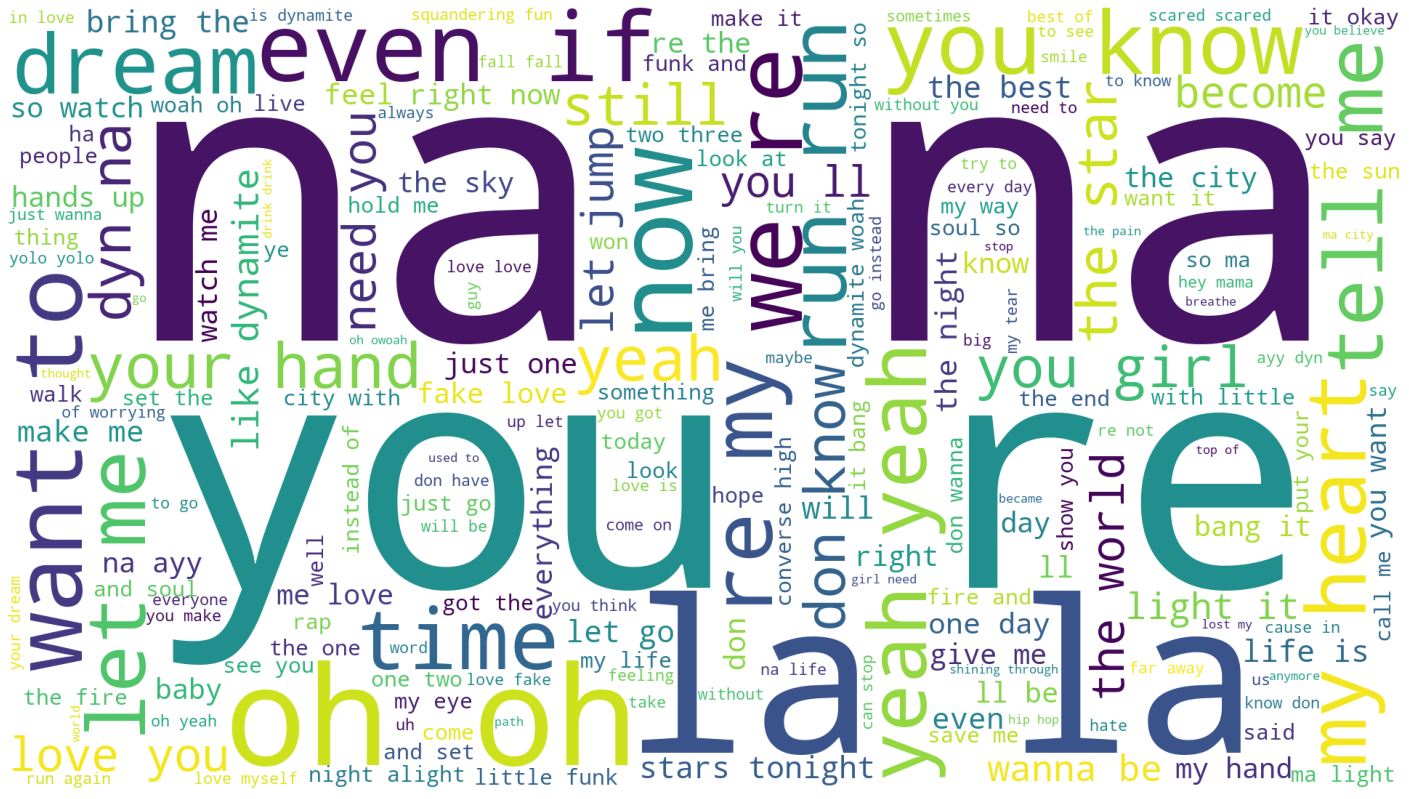

In [139]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline


plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.lyrics))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

* As you can see from the above, there are so many good and relative vibe words. I don't really see words with negative and hurtful vibes!
* Except injections ("na", "oh oh", "la la"), I see "dream", "my heart", "love", "let jump", "star", "my way", "smile", "love myself", "will", "hope", etc.)

## 4. Initializing a document-term matrix (DTM)
The next step is making a document-term matrix (DTM). Here each song will correspond to a document, and each words in lyrics will correspond to a term. This means we can think of the matrix as a “song-lyric” matrix. The size of the matrix should be as the picture shown below.To create this matrix, we'll first make an empty matrix filled with zeros. The length of the matrix is the total number of songs in the data. The width of the matrix is the total number of words in lyrics. After initializing this empty matrix, we'll fill it in the following tasks.

In [140]:
M = len(df_title)
N = len(lyric_idx)
A = np.zeros((M, N))
A.shape

(10, 735)

In [142]:
#check the result
print("The index for dream is", lyric_idx['dream'])

The index for dream is 723


# 5. Creating a counter function
Before we can fill the matrix, let's create a function to count the tokens (i.e., a lyrics list) for each row. Our end goal is to fill the matrix with 1 or 0: if an lyric is in a song, the value is 1. If not, it remains 0. The name of this function, oh_encoder, will become clear next.

In [143]:
# Define the oh_encoder function
def oh_encoder(tokens):
    x = np.zeros(N)
    for lyric in tokens:
        # Get the index for each lyric
        idx = lyric_idx[lyric]
        # Put 1 at the corresponding indices
        x[idx] = 1
    return x

# 6. The Song-Lyric matrix!
Now we'll apply the oh_encoder() functon to the tokens in corpus and set the values at each row of this matrix. So the result will tell us what lyrics each song is composed of. For example, if a song contains "love", "happiest" in lyrics, the outcome of this song will be as follows. This is what we called one-hot encoding. By encoding each lyric in the songs, the Song-Lyric matrix will be filled with binary values.

In [144]:
# Make a document-term matrix
i = 0
for tokens in corpus:
    A[i, :] = oh_encoder(tokens)
    i +=1
    # ... YOUR CODE FOR TASK 6 ..

# 7. Dimension reduction with t-SNE
The dimensions of the existing matrix is (10, 735), which means there are 735 features in our data. For visualization, we should downsize this into two dimensions. We'll use t-SNE for reducing the dimension of the data here.

T-distributed Stochastic Neighbor Embedding (t-SNE) is a nonlinear dimensionality reduction technique that is well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions. Specifically, this technique can reduce the dimension of data while keeping the similarities between the instances. This enables us to make a plot on the coordinate plane, which can be said as vectorizing. All of these songs in our data will be vectorized into two-dimensional coordinates, and the distances between the points will indicate the similarities between the items.

In [145]:
# Dimension reduction with t-SNE
model = TSNE(n_components = 2, learning_rate = 200, random_state = 42)
tsne_features = model.fit_transform(A)

# Make X, Y columns 
df_title['X'] = tsne_features[:, 0]
df_title['Y'] = tsne_features[:, 1]

In [146]:
df_title

,id,album_title,eng_album_title,album_rd,album_seq,track_title,kor_track_title,eng_track_title,lyrics,hidden_track,remix,featured,performed_by,repackaged,lang,X,Y
0,187,MAP OF THE SOUL: 7,MAP OF THE SOUL: 7,2020-02-21,2,작은 것들을 위한 시 (Boy With Luv) ft. Halsey,작은 것들을 위한 시 ft. Halsey,Boy With Luv ft. Halsey,oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh o...,False,False,Halsey,BTS,True,KOR,-123.418617,4.414817
1,188,MAP OF THE SOUL: 7,MAP OF THE SOUL: 7,2020-02-21,3,Make It Right,NA,Make It Right,the moment i noticed myself i had to leave i h...,False,False,NA,BTS,True,KOR,-90.199860,105.894180
2,189,MAP OF THE SOUL: 7,MAP OF THE SOUL: 7,2020-02-21,4,Jamais Vu,NA,Jamais Vu,i think i lost again you look like you re mad ...,False,False,NA,BTS,True,KOR,11.518653,107.759552
3,191,MAP OF THE SOUL: 7,MAP OF THE SOUL: 7,2020-02-21,7,Dionysus,NA,Dionysus,drink it up shot glasses sippin link arms tipp...,False,False,NA,BTS,True,KOR,81.664993,-48.108322
4,192,MAP OF THE SOUL: 7,MAP OF THE SOUL: 7,2020-02-21,7,Black Swan,NA,Black Swan,do your thang do your thang with me now do you...,False,False,NA,BTS,False,KOR,11.049685,-109.545235
5,195,MAP OF THE SOUL: 7,MAP OF THE SOUL: 7,2020-02-21,10,Louder than bombs,NA,Louder than bombs,now it has grown to be so clear the unfamiliar...,False,False,NA,BTS,False,KOR,-93.786461,-85.511841
6,196,MAP OF THE SOUL: 7,MAP OF THE SOUL: 7,2020-02-21,11,ON,NA,ON,i can t understand what people are sayin who a...,False,False,NA,BTS,False,KOR,-27.980738,-37.785275
7,198,MAP OF THE SOUL: 7,MAP OF THE SOUL: 7,2020-02-21,13,00:00 (Zero O'Clock),NA,00:00 (Zero O'Clock),you know those days those days where you re sa...,False,False,NA,BTS,False,KOR,-46.423988,38.948608
8,203,MAP OF THE SOUL: 7,MAP OF THE SOUL: 7,2020-02-21,18,We Are Bulletproof: The Eternal,NA,We Are Bulletproof: The Eternal,we had nothing but dreams nothing but foggy mo...,False,False,NA,BTS,False,KOR,97.685364,58.064781
9,205,MAP OF THE SOUL: 7,MAP OF THE SOUL: 7,2020-02-21,20,ON (Remix) ft. Sia,NA,ON (Remix) ft. Sia,i can t understand what people are sayin who a...,False,True,Sia,BTS,False,KOR,29.144224,16.465530




# 8. Let's map the items with Bokeh
We are now ready to start creating our plot. With the t-SNE values, we can plot all our items on the coordinate plane. And the coolest part here is that it will also show us the eng_album_title, eng_track_title, and album_seq of each song. Let's make a scatter plot using Bokeh and add a hover tool to show that information. Note that we won't display the plot yet as we will make some more additions to it.

In [147]:
from bokeh.io import show, output_notebook, push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
output_notebook()

# Make a source and a scatter plot  
source = ColumnDataSource(df_title)
plot = figure(x_axis_label ='T-SNE 1', 
              y_axis_label ='T-SNE 2', 
              width = 500, height = 400)
plot.circle(x = 'X', 
    y = 'Y', 
    source = source, 
    size = 10, color = '#FF7373', alpha = .8)

Loading BokehJS ...

GlyphRenderer(id='1947', ...)

# 9. Adding a hover tool
Why don't we add a hover tool? Adding a hover tool allows us to check the information of each item whenever the cursor is directly over a glyph. We'll add tooltips with each product's name, brand, price, and rank (i.e., rating).

In [148]:
# Create a HoverTool object
hover = HoverTool(tooltips = [('eng_album_title', '@eng_album_title'),
                              ('track_title', '@track_title'),
                              ('album_seq', '@album_seq')])
                    
plot.add_tools(hover)


# 10. Mapping the songs 
Finally, it's show time! Let's see how the map we've made looks like. Each point on the plot corresponds to the songs. Then what do the axes mean here? The axes of a t-SNE plot aren't easily interpretable in terms of the original data. Like mentioned above, t-SNE is a visualizing technique to plot high-dimensional data in a low-dimensional space. Therefore, it's not desirable to interpret a t-SNE plot quantitatively.

Instead, what we can get from this map is the distance between the points (which items are close and which are far apart). **The closer the distance between the two songs is, the more similar the composition they have.** 

**Therefore this enables us to compare the songs

In [149]:
# Plot the map
# ... YOUR CODE FOR TASK 10 ...
show(plot)

# 11. Comparing lyrics of two songs

Use this little lyrics engine help us compare two songs and see their similarity with lyrics 

In [151]:
# Print the lyrics of two similar songs
song_1 = df_title[df_title['track_title'] == "We Are Bulletproof: The Eternal "]
song_2 = df_title[df_title['track_title'] == "ON (Remix) ft. Sia "]

# Display each song's data and lyrics
display(song_1)
print(song_1.lyrics.values)

display(song_2)
print(song_2.lyrics.values)

,id,album_title,eng_album_title,album_rd,album_seq,track_title,kor_track_title,eng_track_title,lyrics,hidden_track,remix,featured,performed_by,repackaged,lang,X,Y
8,203,MAP OF THE SOUL: 7,MAP OF THE SOUL: 7,2020-02-21,18,We Are Bulletproof: The Eternal,NA,We Are Bulletproof: The Eternal,we had nothing but dreams nothing but foggy mo...,False,False,NA,BTS,False,KOR,97.685364,58.064781


['we had nothing but dreams nothing but foggy mornings when we opened our eyes we stayed up all night to dance and sing the endless music sheets ay we bravely shout throw all you have first fight with the world don t wanna die but so much pain too much cryin so blunted blades oh i i i i i i i i we were only seven i i i i i i i i but we have you all now after seven winters and springs at the tips of our entwined fingers oh i i i i i i i i yeah we got to heaven throw stones at me we don t fear anymore we are we are together bulletproof yeah we have you have you even if winter comes again even if i m blocked off i will still walk we are we are forever bulletproof yeah we got to heaven we are bullet bullet bulletproof we faced the negative looks and did it bad memories numerous trials we bravely blocked them all bulletproof i always think am i still in a dream is it really spring that came after the long winter the name that everyone laughed at that was once embarrassing this is the iron p

,id,album_title,eng_album_title,album_rd,album_seq,track_title,kor_track_title,eng_track_title,lyrics,hidden_track,remix,featured,performed_by,repackaged,lang,X,Y
9,205,MAP OF THE SOUL: 7,MAP OF THE SOUL: 7,2020-02-21,20,ON (Remix) ft. Sia,NA,ON (Remix) ft. Sia,i can t understand what people are sayin who a...,False,True,Sia,BTS,False,KOR,29.144224,16.46553


['i can t understand what people are sayin who and what do i need to follow with each step then again grows the shadow where is this place i open my eyes to maybe seoul or new york or paris i get up unsteady on my feet look at my feet look down the shadow resembles me is it the shadow that s shaking or is it my feet that are trembling of course i m not unafraid of course it s not all okay but i know awkwardly i flow i fly together with that black wind hey na na na gotta go insane to stay sane hey na na na throw myself whole into both worlds hey na na na can t hold me down cuz you know i m a fighter carried myself into this beautiful prison find me and i m gonna live with ya eh oh bring it bring the pain oh yeah eh oh come on up bring the pain oh yeah rain be pourin sky keep fallin everyday oh na na na eh oh bring it bring the pain oh yeah bring the pain it ll become my blood and flesh bring the pain no fear now that i know the way breathe on the small things my air and my light in the 